In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm

In [2]:
df=pd.read_excel('Superstore.xls')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


we are interested only in furniture sales

In [4]:
furniture=pd.DataFrame(df.loc[df['Category']=='Furniture'])

In [5]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Dropping all columns except 'sales' and setting the 'Order Date' as our Index

In [7]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols,axis=1,inplace=True)
furniture = furniture.sort_values('Order Date')

In [8]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:
furniture = furniture.set_index('Order Date')

In [10]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


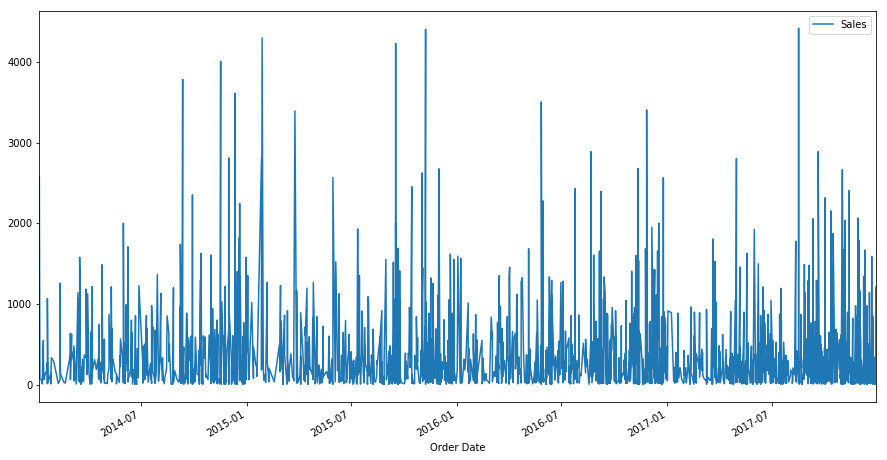

In [11]:
furniture.plot(figsize=(15,8))

Daily Data is confusing to work with hence we can resample and work with monthly data, sales of each month will be the mean 
daily sales of that month 

In [12]:
y = furniture['Sales'].resample('MS').mean() 

In [13]:
y.head()

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
Freq: MS, Name: Sales, dtype: float64

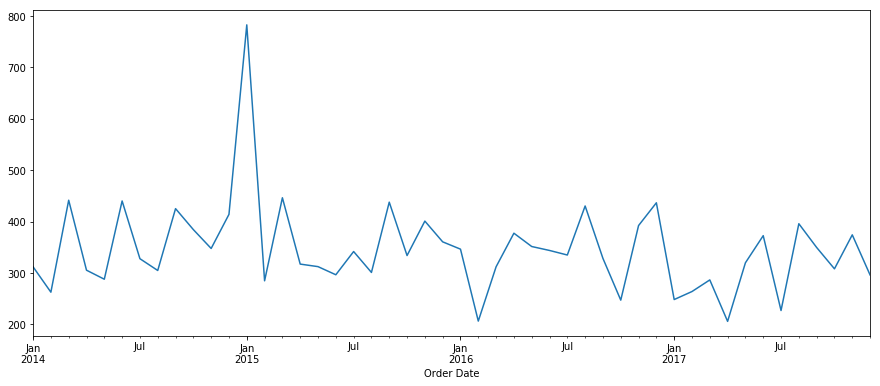

In [14]:
y.plot(figsize = (15,6))

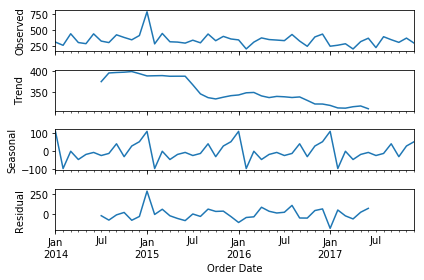

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, model='additive')
fig = result.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

Using the Augmented Dicky Fuller Test to check if our data is stationary, The dicky fuller test has a null hypotheses that the data is non-stationary

In [17]:
result=adfuller(y)
result[1]

# P-Value is very low hence we reject the null hypotheses and assume our data is stationary 

9.093398510006677e-10

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

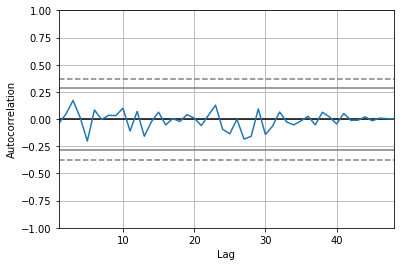

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

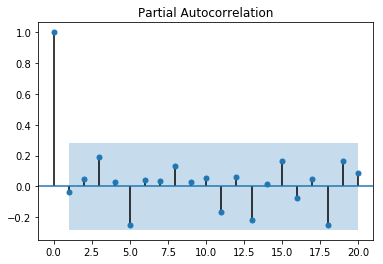

In [20]:
fig_pacf = plot_pacf(y,lags=20)

In [97]:
from statsmodels.tsa.arima_model import ARIMA

model = sm.tsa.statespace.SARIMAX(y,order=(1, 0, 1),seasonal_order=(1, 1, 0, 12),
                                  enforce_stationarity=False,enforce_invertibility=False)

results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3565      1.222      0.292      0.770      -2.039       2.752
ma.L1         -0.2517      1.391     -0.181      0.856      -2.979       2.475
ar.S.L12       0.0289      0.162      0.178      0.858      -0.289       0.346
sigma2      6578.4870   2537.791      2.592      0.010    1604.509    1.16e+04


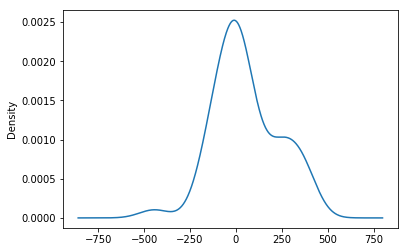

In [98]:
results.resid.plot(kind='kde')

In [99]:
y.count()

48

In [108]:
forecast = results.predict(start = 30, end= 48, dynamic= True)  

In [109]:
forecast

2016-07-01    348.754513
2016-08-01    303.409848
2016-09-01    439.072555
2016-10-01    332.909010
2016-11-01    402.693332
2016-12-01    359.209099
2017-01-01    333.892951
2017-02-01    204.348228
2017-03-01    308.344097
2017-04-01    379.224576
2017-05-01    352.755310
2017-06-01    345.328757
2017-07-01    348.953829
2017-08-01    303.473565
2017-09-01    439.106924
2017-10-01    332.875367
2017-11-01    402.740844
2017-12-01    359.165541
2018-01-01    333.528851
Freq: MS, dtype: float64

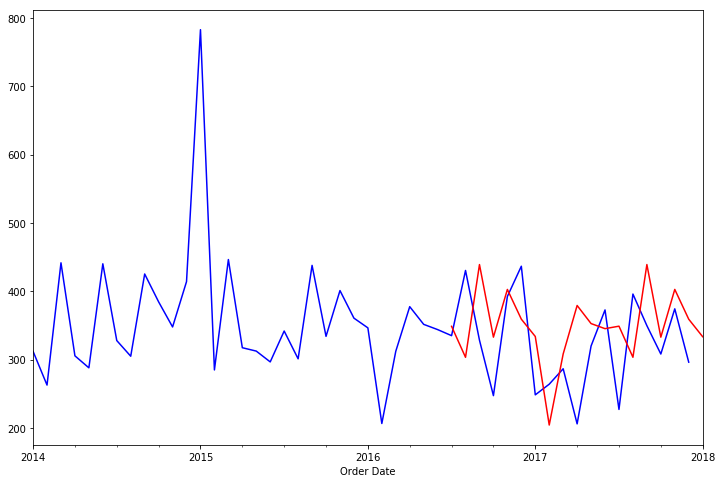

In [110]:
y.plot(color='blue',figsize=(12,8))
forecast.plot(color='red')

In [111]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

In [112]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6923.15


In [113]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 83.21


In [118]:
future_forecast = results.predict(start = 48, end = 60, dynamic= True)  

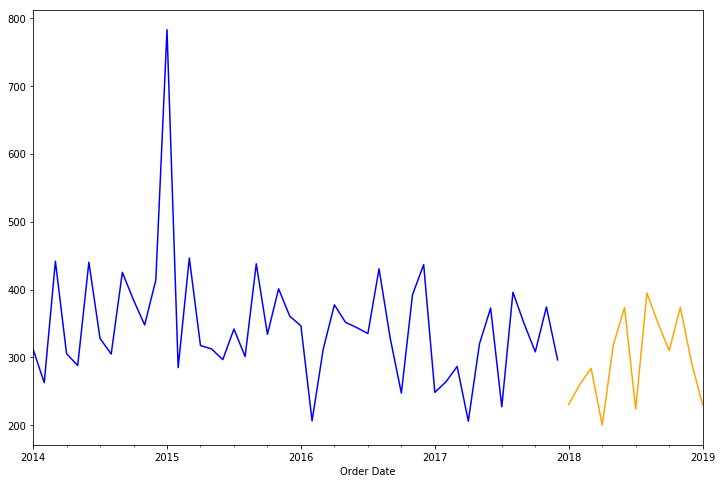

In [119]:
y.plot(color='blue',figsize=(12,8))
future_forecast.plot(color='orange')